Load Dataset

In [ ]:
import pandas as pd
import re

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/medical dataset/Medical Speech, Transcription, and Intent/overview-of-recordings.csv')

Data analysis

In [ ]:
data.head() # exploring dataset

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495


In [ ]:
data.isnull().sum() # check for null values

,0
audio_clipping,0
audio_clipping:confidence,0
background_noise_audible,0
background_noise_audible:confidence,0
overall_quality_of_the_audio,0
quiet_speaker,0
quiet_speaker:confidence,0
speaker_id,0
file_download,0
file_name,0


In [ ]:
# prompt: from the above dataset acess the csv

print(dataset['train'][0])


Data Visualisation


In [ ]:
df_text = df[['phrase', 'prompt']]
df_text


,phrase,prompt
0,When I remember her I feel down,Emotional pain
1,When I carry heavy things I feel like breaking...,Hair falling out
2,there is too much pain when i move my arm,Heart hurts
3,My son had his lip pierced and it is swollen a...,Infected wound
4,My muscles in my lower back are aching,Infected wound
...,...,...
6656,I feel a burning sensation in my guts about 2 ...,Stomach ache
6657,I have a split on my thumb that will not heal.,Open wound
6658,I feel a lot of pain in the joints.,Joint pain
6659,The area around my heart doesn't feel good.,Heart hurts


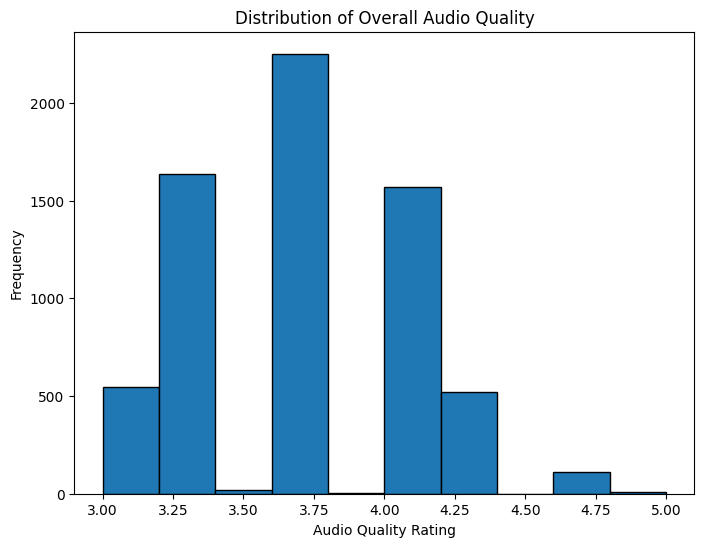

In [ ]:
import matplotlib.pyplot as plt

# Plot: Distribution of Overall Audio Quality
plt.figure(figsize=(8, 6))
data['overall_quality_of_the_audio'].plot(kind='hist', bins=10, edgecolor='black')
plt.title('Distribution of Overall Audio Quality')
plt.xlabel('Audio Quality Rating')
plt.ylabel('Frequency')
plt.show()


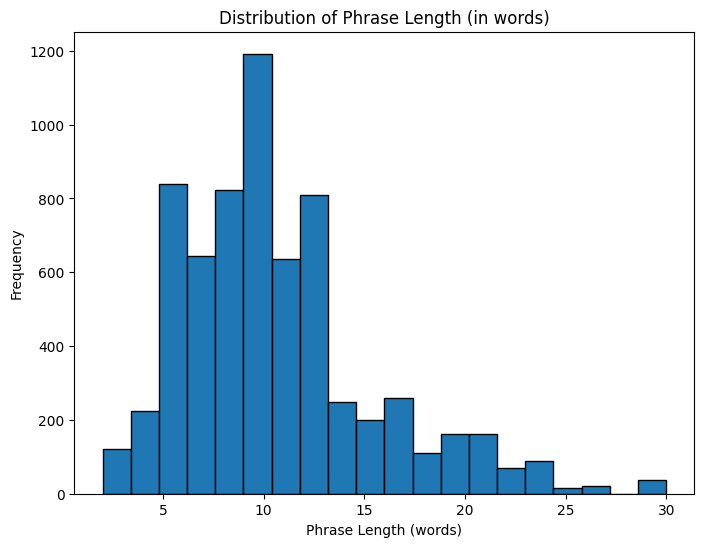

In [ ]:
# Calculate phrase length in words
data['phrase_length'] = data['phrase'].apply(lambda x: len(x.split()))

# Plot: Phrase Length Distribution
plt.figure(figsize=(8, 6))
data['phrase_length'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Phrase Length (in words)')
plt.xlabel('Phrase Length (words)')
plt.ylabel('Frequency')
plt.show()

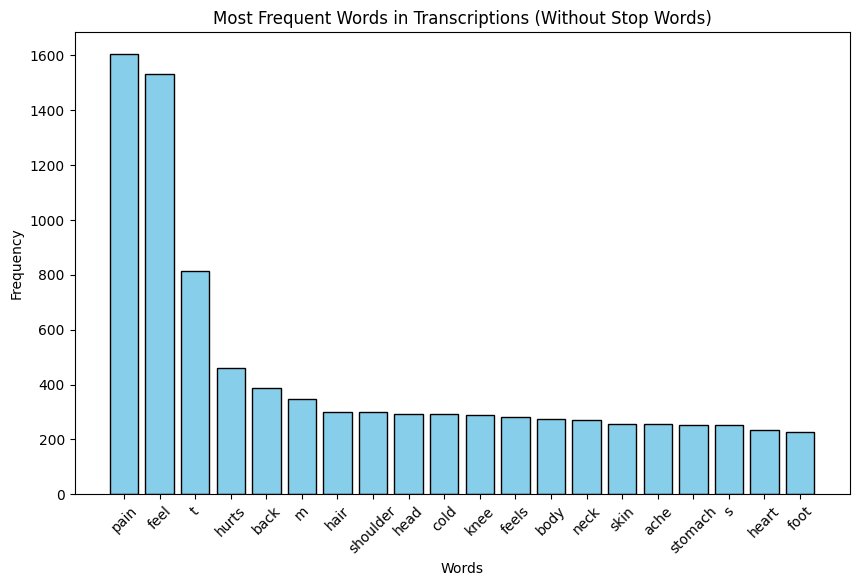

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import re
from wordcloud import STOPWORDS

# Define custom stop words by adding to the existing STOPWORDS set
stopwords = set(STOPWORDS)
stopwords.update(["your", "specific", "terms", "im", "cant"])  # Add any custom stop words here

# Step 1: Combine all phrases and tokenize
all_words = ' '.join(data['phrase']).lower()  # Combine all phrases into a single string
all_words = re.findall(r'\b\w+\b', all_words)  # Extract words using regex

# Step 2: Filter out stop words
filtered_words = [word for word in all_words if word not in stopwords]

# Step 3: Calculate word frequency
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)  # Adjust the number as needed

# Step 4: Plot the most frequent words
words, counts = zip(*common_words)  # Unzip into separate lists for plotting
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue', edgecolor='black')
plt.title('Most Frequent Words in Transcriptions (Without Stop Words)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


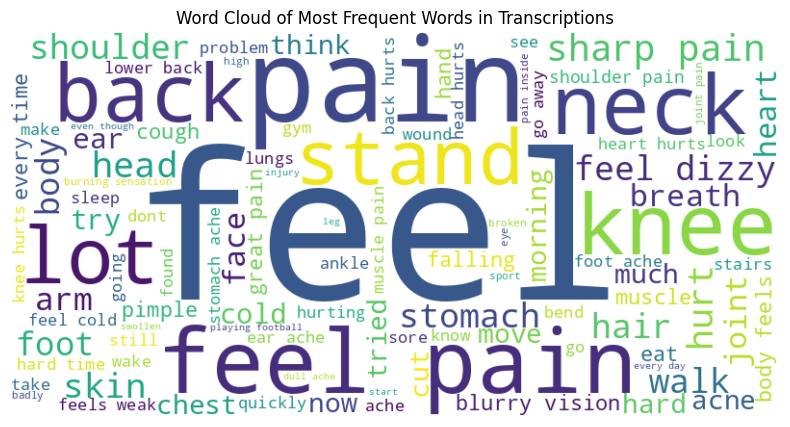

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re

# Step 1: Combine all phrases into a single text and clean it
all_text = ' '.join(data['phrase']).lower()  # Combine all phrases into one string
all_text = re.sub(r'[^\w\s]', '', all_text)  # Remove punctuation

# Step 2: Define stop words
stopwords = set(STOPWORDS)
stopwords.update(["your", "specific", "terms", "im", "cant"])  # Add custom stop words here

# Step 3: Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      stopwords=stopwords, max_words=100, colormap='viridis').generate(all_text)

# Step 4: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes for a cleaner look
plt.title('Word Cloud of Most Frequent Words in Transcriptions')
plt.show()
